<a href="https://colab.research.google.com/github/flowonthegoliv/ENVS666_2024/blob/main/Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OK, so we still have some other data -- lets start by looking at those Plume Sensors Remeber you can borrow these!

In [62]:
#OK let's import pandas
import pandas as pd
#Hello Numpy again
import numpy as np
#well also need some requests
import requests

In [63]:
url = "https://jonnyhigham.com/ENVS666/plume_api.php"
response = requests.get(url)
data = response.json()
sensors = data['sensorInfo']
df = pd.DataFrame(sensors)

df

,sensor_name,start_date,end_date
0,station_1,2021-09-21 19:41:22,2023-01-31 21:11:07
1,station_10,2021-09-28 08:58:22,2024-02-06 11:31:59
2,station_11,2021-09-28 08:58:30,2023-09-20 04:56:03
3,station_12,2021-10-11 08:25:34,2022-03-02 22:33:06
4,station_13,2021-09-27 09:55:28,2024-02-06 11:33:59
5,station_2,2021-10-05 08:33:51,2024-02-06 11:36:35
6,station_3,2021-10-05 08:56:35,2024-02-06 11:28:41
7,station_4,2021-10-05 08:47:11,2024-02-13 11:25:39
8,station_5,2021-09-28 13:11:58,2024-02-13 12:15:09
9,station_6,2021-09-28 08:59:27,2024-02-06 11:28:41


In [90]:
startDate = '2023-02-01'
endDate = '2024-01-31'
sensor = 4

url = "https://jonnyhigham.com/ENVS666/plume_api.php?sensor="+str(sensor)+"&startDate="+startDate+"&endDate="+endDate
response = requests.get(url)
data = response.json()
data = data['data']
df = pd.DataFrame(data)

# print(url)

df

,Timestamp,Longitude,Latitude,NO2,VOC,PM1.0,PM2.5,PM10.0
0,2023-02-14 13:32:49,-2.96303,53.40481,0.45,134.5,11.64,12.64,13.64
1,2023-02-14 13:33:42,-2.96301,53.40482,1.42,115.5,10.88,11.88,12.88
2,2023-02-14 13:34:34,-2.96301,53.40480,2.46,108.0,13.81,14.81,15.81
3,2023-02-14 13:35:26,-2.96302,53.40480,2.96,106.0,17.65,18.65,19.65
4,2023-02-14 13:36:17,-2.96057,53.40242,3.02,104.5,17.46,18.46,19.46
...,...,...,...,...,...,...,...,...
1003,2023-03-31 12:54:15,-2.96785,53.40241,0.00,168.0,1.00,2.00,3.00
1004,2023-03-31 12:59:44,-2.96712,53.40257,0.00,166.5,1.00,2.00,3.00
1005,2023-03-31 13:05:43,-2.96782,53.40239,0.00,168.5,1.00,2.00,3.30
1006,2023-03-31 13:06:02,-2.96695,53.40264,0.00,168.5,1.00,2.00,3.30


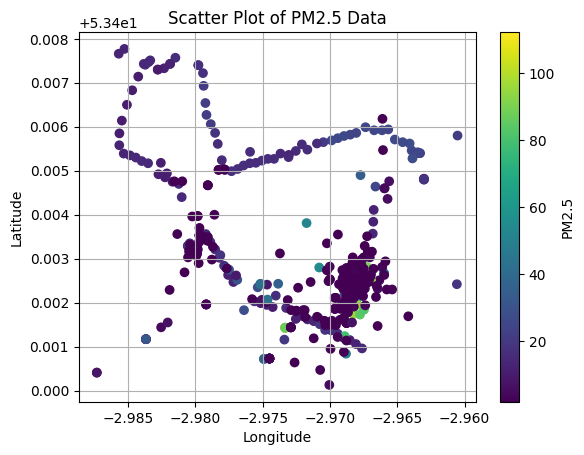

In [91]:
import matplotlib.pyplot as plt

# Scatter plot with pollutant-based color
plt.scatter(df['Longitude'], df['Latitude'], c=df['PM2.5'], cmap='viridis', alpha=1)  # Adjust 's' for marker size
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of PM2.5 Data')
plt.grid(True)
plt.colorbar(label='PM2.5')
plt.show()


Lets maybe do some filtering now:

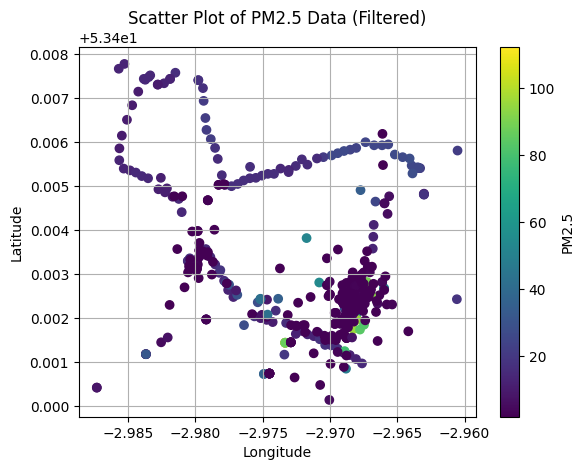

In [92]:
import matplotlib.pyplot as plt

# Define start and end dates
start_date = '2022-02-01'
end_date = '2024-03-20'

# Filter the DataFrame based on the date range
filtered_df = df[(df['Timestamp'] >= start_date) & (df['Timestamp'] <= end_date)]

# Scatter plot with pollutant-based color for the filtered data
plt.scatter(filtered_df['Longitude'], filtered_df['Latitude'], c=filtered_df['PM2.5'], cmap='viridis', alpha=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of PM2.5 Data (Filtered)')
plt.grid(True)
plt.colorbar(label='PM2.5')
plt.show()


Hey Señor GTP can you add a map beneath this code:

In [93]:
import folium
from folium.plugins import MarkerCluster

# Define start and end dates
start_date = '2022-02-01'
end_date = '2024-03-20'
pollutant = 'PM2.5'

# Filter the DataFrame based on the date range
filtered_df = df[(df['Timestamp'] >= start_date) & (df['Timestamp'] <= end_date)]

# Create a Folium Map centered around the mean latitude and longitude
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the marker cluster
for idx, row in filtered_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                   popup=f"{pollutant}: {row[pollutant]}").add_to(marker_cluster)

# Display the Folium map
m


In [94]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
from branca.colormap import LinearColormap

# Convert 'Rating' column to numeric type
# df['Rating'] = pd.to_numeric(df['Rating'])

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a map centered around Liverpool
m = folium.Map(location=[53.4084, -2.9916], zoom_start=10)

# Create a map centered around Liverpool
m = folium.Map(location=[53.4084, -2.9916], zoom_start=10)

# Create a colormap from red to green
colormap = LinearColormap(colors=['green', 'blue'], vmin=0, vmax=20)

# Add markers to the map
for index, row in df.iterrows():
    color = colormap(row['PM2.5'])
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.7,
    ).add_to(m)

# Add color legend to the map
colormap.add_to(m)
# Display the map
m

What about that perception?

In [95]:
import requests
import pandas as pd
url = "https://jonnyhigham.com/ENVS666/per_api.php"
response = requests.get(url)
data = response.json()

sensors = data
df = pd.DataFrame(sensors)

df

,Timestamp,Longitude,Latitude,Rating,Image
0,2024-01-04 13:54:38,-1.49388,53.35760,0,https://jonnyhigham.com/ENVS666perimages/24703...
1,2024-01-25 12:33:13,-1.48615,53.36188,3,https://jonnyhigham.com/ENVS666perimages/84859...
2,2024-01-25 12:37:38,-1.48814,53.36469,2,https://jonnyhigham.com/ENVS666perimages/82585...
3,2024-02-06 09:20:50,-2.96558,53.40550,2,https://jonnyhigham.com/ENVS666perimages/13871...
4,2024-02-06 09:21:16,-2.96544,53.40559,0,https://jonnyhigham.com/ENVS666perimages/58018...
...,...,...,...,...,...
97,2024-02-13 13:21:56,-2.96380,53.40232,2,https://jonnyhigham.com/ENVS666perimages/57490...
98,2024-02-13 13:23:46,-2.96641,53.40695,0,https://jonnyhigham.com/ENVS666perimages/52462...
99,2024-02-13 13:26:13,-2.96552,53.40608,0,https://jonnyhigham.com/ENVS666perimages/29989...
100,2024-02-13 13:26:48,-2.96440,53.40586,0,https://jonnyhigham.com/ENVS666perimages/27432...


In [96]:
import requests
import pandas as pd

startDate = '2022-01-01'
endDate = '2024-02-31'

url = "https://jonnyhigham.com/ENVS666/per_api.php?startDate="+startDate+"&endDate="+endDate
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

print(url)

df

https://jonnyhigham.com/ENVS666/per_api.php?startDate=2022-01-01&endDate=2024-02-31


,Timestamp,Longitude,Latitude,Rating,Image
0,2024-01-04 13:54:38,-1.49388,53.35760,0,https://jonnyhigham.com/ENVS666perimages/24703...
1,2024-01-25 12:33:13,-1.48615,53.36188,3,https://jonnyhigham.com/ENVS666perimages/84859...
2,2024-01-25 12:37:38,-1.48814,53.36469,2,https://jonnyhigham.com/ENVS666perimages/82585...
3,2024-02-06 09:20:50,-2.96558,53.40550,2,https://jonnyhigham.com/ENVS666perimages/13871...
4,2024-02-06 09:21:16,-2.96544,53.40559,0,https://jonnyhigham.com/ENVS666perimages/58018...
...,...,...,...,...,...
97,2024-02-13 13:21:56,-2.96380,53.40232,2,https://jonnyhigham.com/ENVS666perimages/57490...
98,2024-02-13 13:23:46,-2.96641,53.40695,0,https://jonnyhigham.com/ENVS666perimages/52462...
99,2024-02-13 13:26:13,-2.96552,53.40608,0,https://jonnyhigham.com/ENVS666perimages/29989...
100,2024-02-13 13:26:48,-2.96440,53.40586,0,https://jonnyhigham.com/ENVS666perimages/27432...


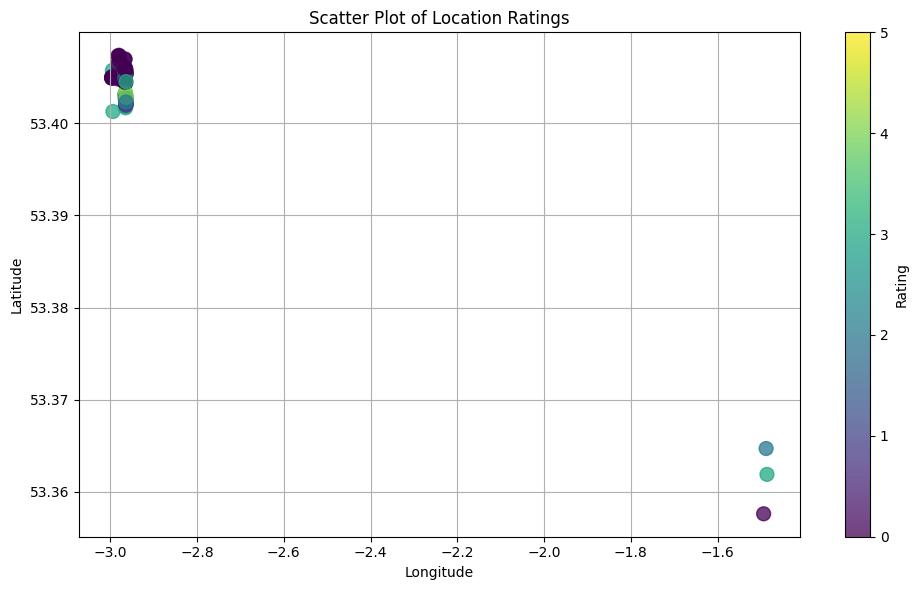

In [97]:
import matplotlib.pyplot as plt

df['Rating'] = pd.to_numeric(df['Rating'])
# Convert 'Timestamp' column to datetime format
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Rating'], cmap='viridis', s=100, alpha=0.75, vmin=0, vmax=5)
plt.colorbar(label='Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Location Ratings')
plt.grid(True)
plt.tight_layout()
plt.show()


In [98]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Convert 'Rating' column to numeric type
df['Rating'] = pd.to_numeric(df['Rating'])

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a map centered around Liverpool
m = folium.Map(location=[53.4084, -2.9916], zoom_start=10)

# Add marker clusters
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=f'Rating: {row["Rating"]}').add_to(marker_cluster)

# Display the map
m


In [99]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
from branca.colormap import LinearColormap

# Convert 'Rating' column to numeric type
df['Rating'] = pd.to_numeric(df['Rating'])

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a map centered around Liverpool
m = folium.Map(location=[53.4084, -2.9916], zoom_start=10)

# Create a map centered around Liverpool
m = folium.Map(location=[53.4084, -2.9916], zoom_start=10)

# Create a colormap from red to green
colormap = LinearColormap(colors=['red', 'green'], vmin=0, vmax=5)

# Add markers to the map
for index, row in df.iterrows():
    color = colormap(row['Rating'])
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.7,
    ).add_to(m)

# Add color legend to the map
colormap.add_to(m)
# Display the map
m

What about your personal sensors?

In [100]:
url = "https://jonnyhigham.com/ENVS666/shared_api.php"
response = requests.get(url)
data = response.json()

sensors = data['sensorInfo']
df = pd.DataFrame(sensors)

df

,sensor_id,Longitude,Latitude,Room,Mech Ventilation,Windows,Doors,start_date,end_date
0,J0820,-2.964790,53.401493,Kitchen,yes,3,3,2024-01-30 20:57:35,2024-02-13 08:51:12
1,jonny,-1.493676,53.357560,NULL,NULL,0,NULL,2024-01-04 18:10:00,2024-01-12 12:59:29
2,YN08,-2.975334,53.400534,Kitchen,yes,2,1,2024-02-13 11:24:54,2024-02-27 09:49:48
3,YP13,NULL,NULL,NULL,NULL,0,NULL,2024-02-13 13:23:36,2024-02-27 09:49:45
4,XT33,NULL,NULL,NULL,NULL,0,NULL,2024-02-13 13:43:32,2024-02-13 14:57:53
5,PU68,-2.984580,53.399145,Kitchen,yes,2,2,2024-02-13 13:02:56,2024-02-27 09:50:07
6,VT09,NULL,NULL,NULL,NULL,0,NULL,2024-02-13 12:10:58,2024-02-13 12:14:15
7,MR03,-3.435973,55.378051,Bedroom,no,1,1,2024-02-13 14:25:32,2024-02-27 09:50:03
8,NN18,-2.957963,53.408916,Kitchen,no,3,2,2024-02-13 13:08:35,2024-02-27 09:49:37
9,EH23,-2.927118,53.389180,Kitchen,yes,1,1,2024-02-13 15:32:25,2024-02-27 09:49:42


In [112]:
startDate = '2022-01-01'
endDate = '2024-02-31'
sensor = 'NN18'

url = "https://jonnyhigham.com/ENVS666/shared_api.php?sensor="+str(sensor)+"&startDate="+startDate+"&endDate="+endDate
response = requests.get(url)
data = response.json()
data = data['data']
df = pd.DataFrame(data)

print(url)

df

https://jonnyhigham.com/ENVS666/shared_api.php?sensor=NN18&startDate=2022-01-01&endDate=2024-02-31


,Timestamp,Temperature,Humidity,PM1.0,PM2.5,PM10.0
0,2024-02-13 13:08:35,23.4,0,10,16,20
1,2024-02-13 14:07:51,19.0,0,1,3,3
2,2024-02-13 14:08:00,19.4,0,1,3,3
3,2024-02-13 14:08:33,19.9,0,1,2,2
4,2024-02-13 14:09:06,20.2,0,1,2,4
...,...,...,...,...,...,...
27633,2024-02-27 10:00:06,19.9,0,2,4,4
27634,2024-02-27 10:00:39,19.9,0,3,4,5
27635,2024-02-27 10:01:13,19.9,0,2,7,7
27636,2024-02-27 10:01:46,19.9,0,3,4,7


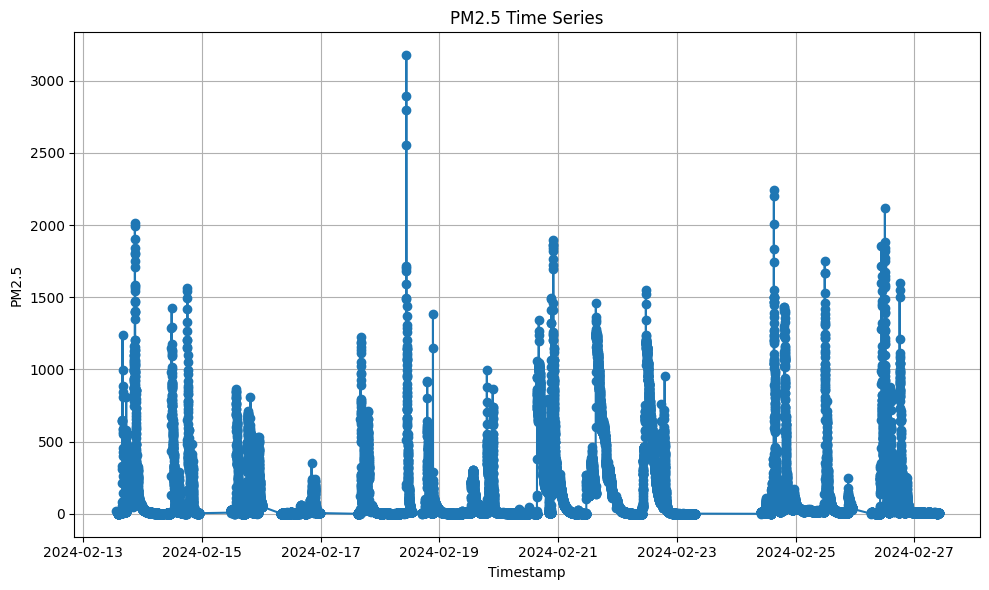

In [104]:
# Plot
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set 'Timestamp' as index
df.set_index('Timestamp', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['PM2.5'], marker='o', linestyle='-')
plt.title('PM2.5 Time Series')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()

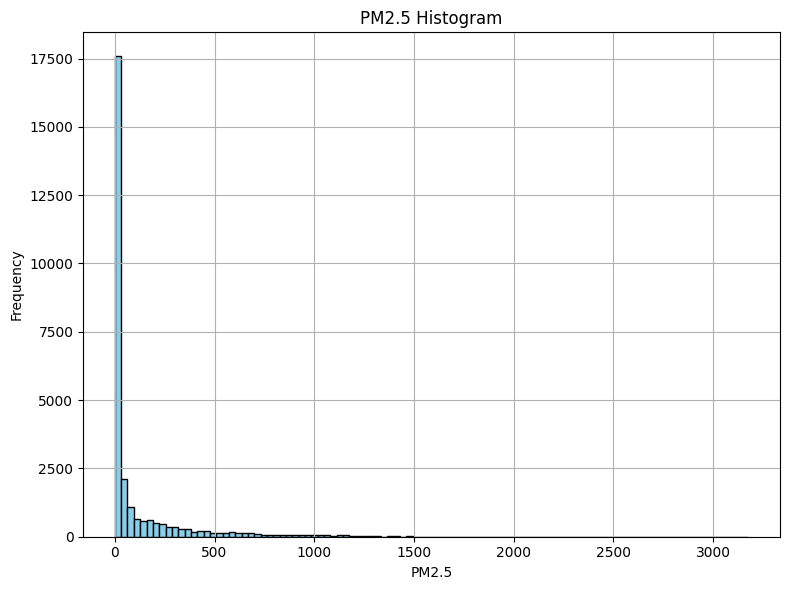

In [106]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df['PM2.5'], bins=100, color='skyblue', edgecolor='black')
plt.title('PM2.5 Histogram')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


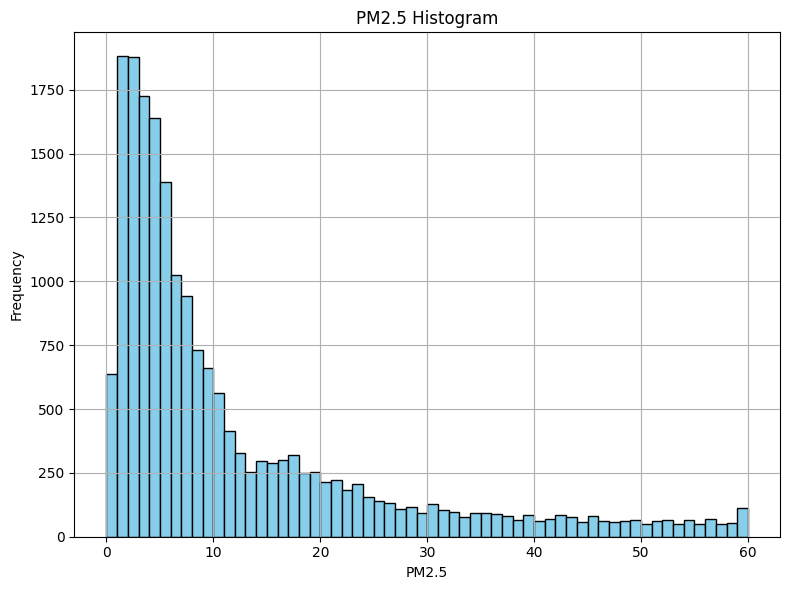

In [110]:
import matplotlib.pyplot as plt

# Define bin edges including the upper bound of 100
bin_edges = list(range(0, 61, 1))

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df['PM2.5'], bins=bin_edges, color='skyblue', edgecolor='black')
plt.title('PM2.5 Histogram')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

resample data to be in hourly intervals

In [113]:
startDate = '2022-01-01'
endDate = '2024-02-31'
sensor = 'NN18'

url = "https://jonnyhigham.com/ENVS666/shared_api.php?sensor="+str(sensor)+"&startDate="+startDate+"&endDate="+endDate
response = requests.get(url)
data = response.json()
data = data['data']
df = pd.DataFrame(data)

print(url)

df

df_hours = df.copy()
# Convert 'Timestamp' column to datetime format
df_hours['Timestamp'] = pd.to_datetime(df_hours['Timestamp'])
# Set 'Timestamp' column as the index
df_hours.set_index('Timestamp', inplace=True)
# Resample the DataFrame at hourly intervals
hourly_df = df_hours.resample('H').mean()  # This takes the mean of each hour
# If you want to interpolate missing values after resampling
hourly_df = hourly_df.interpolate(method='linear')
# Create a new DataFrame for the resampled data
resampled_df = pd.DataFrame(hourly_df)

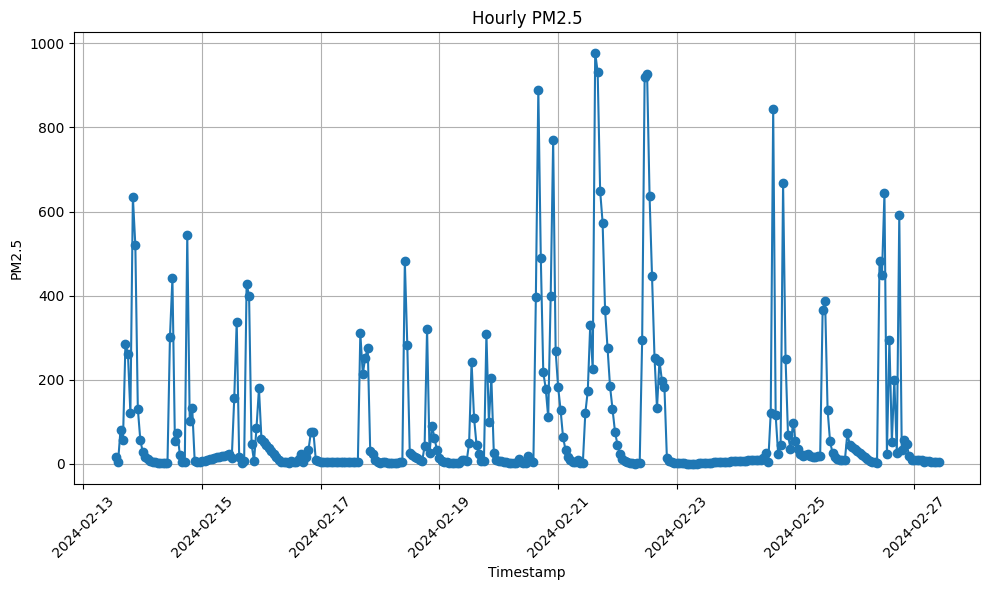

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(hourly_df.index, hourly_df['PM2.5'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.title('Hourly PM2.5')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

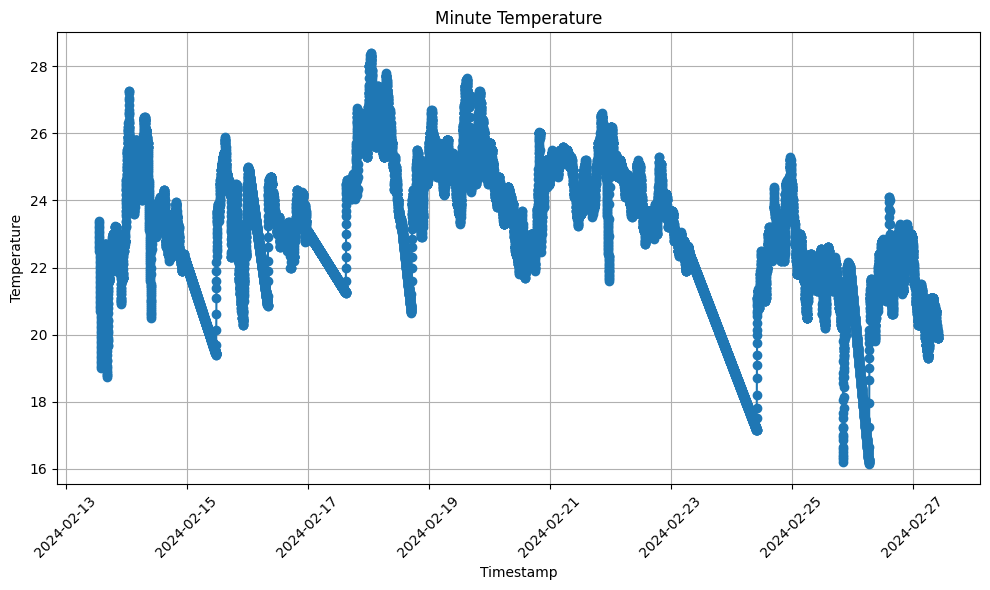

                     Temperature  Humidity      PM1.0      PM2.5     PM10.0
Timestamp                                                                  
2024-02-13 13:08:00    23.400000       0.0  10.000000  16.000000  20.000000
2024-02-13 13:09:00    23.325424       0.0   9.847458  15.779661  19.711864
2024-02-13 13:10:00    23.250847       0.0   9.694915  15.559322  19.423729
2024-02-13 13:11:00    23.176271       0.0   9.542373  15.338983  19.135593
2024-02-13 13:12:00    23.101695       0.0   9.389831  15.118644  18.847458
...                          ...       ...        ...        ...        ...
2024-02-27 09:58:00    19.900000       0.0   2.000000   4.000000   6.000000
2024-02-27 09:59:00    19.900000       0.0   2.500000   6.500000   6.500000
2024-02-27 10:00:00    19.900000       0.0   2.500000   4.000000   4.500000
2024-02-27 10:01:00    19.900000       0.0   2.500000   5.500000   7.000000
2024-02-27 10:02:00    19.900000       0.0   3.000000   5.000000   7.000000

[19975 rows

In [115]:
import matplotlib.pyplot as plt
# Assuming df contains the data you retrieved
# Make a copy of the original DataFrame and rename it to df_minutes
df_minutes = df.copy()
# Convert 'Timestamp' column to datetime format
df_minutes['Timestamp'] = pd.to_datetime(df_minutes['Timestamp'])
# Set 'Timestamp' column as the index
df_minutes.set_index('Timestamp', inplace=True)
# Resample the DataFrame at minute intervals
minute_df = df_minutes.resample('T').mean()  # This takes the mean of each minute
# If you want to interpolate missing values after resampling
minute_df = minute_df.interpolate(method='linear')
# Create a new DataFrame for the resampled data
resampled_df = pd.DataFrame(minute_df)
# Plot the resampled data
plt.figure(figsize=(10, 6))
plt.plot(resampled_df.index, resampled_df['Temperature'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Minute Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the new DataFrame
print(resampled_df)
